        Name: Ashwini Giri          USC ID: 5413882039                 Team: Vectors

# Full data Analysis using spark

In [1]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [2]:
from pyspark import SQLContext
sqlContext = SQLContext(sc)

In [3]:
df = sqlContext.read.csv("data.csv",header=True)

In [4]:
df.show()

+--------+------+-----------------+----------+------------+--------------------+
|Building| Level|    ClientMacAddr|       lat|         lng|           localtime|
+--------+------+-----------------+----------+------------+--------------------+
| Gallery|Level5|38:ff:36:4c:1a:18|1.29086614|103.85172392|2018-07-31 18:20:...|
| Gallery|Level5|38:ff:36:4c:ad:23|1.29086614|103.85172392|2018-07-31 13:42:...|
| Gallery|Level5|38:ff:36:4c:ad:23|1.29086614|103.85172392|2018-07-31 14:58:...|
| Gallery|Level5|38:ff:36:4c:ae:53|1.29086614|103.85172392|2018-07-31 17:44:...|
| Gallery|Level5|38:ff:36:4c:b5:83|1.29086614|103.85172392|2018-07-31 13:26:...|
| Gallery|Level5|38:ff:36:4c:b5:83|1.29086614|103.85172392|2018-07-31 15:35:...|
| Gallery|Level5|38:ff:36:cc:1a:18|1.29086614|103.85172392|2018-07-31 17:57:...|
| Gallery|Level5|38:ff:36:cc:1a:18|1.29086614|103.85172392|2018-07-31 18:32:...|
| Gallery|Level5|48:3b:38:24:63:c0|1.29086614|103.85172392|2018-07-31 15:26:...|
| Gallery|Level5|4c:74:bf:69

In [5]:
df.printSchema()

root
 |-- Building: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- ClientMacAddr: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- localtime: string (nullable = true)



In [9]:
df.columns

['Building', 'Level', 'ClientMacAddr', 'lat', 'lng', 'localtime']

In [11]:
shape = (df.count(),len(df.columns))

In [12]:
shape

(260068750, 6)

In [13]:
df.describe().show()

+-------+---------+---------+-----------------+--------------------+--------------------+--------------------+
|summary| Building|    Level|    ClientMacAddr|                 lat|                 lng|           localtime|
+-------+---------+---------+-----------------+--------------------+--------------------+--------------------+
|  count|260068750|260068750|        260068750|           260068750|           260068750|           260068750|
|   mean|     null|     null|             null|  1.2904670285439896|   103.8516847241262|                null|
| stddev|     null|     null|             null|3.930378247417363E-4|2.911652326835760...|                null|
|    min|  Gallery|  Level 1|00:00:00:00:00:00|          1.28961633|          103.850815|2018-04-01 08:01:...|
|    max|  Gallery|   Level5|fe:ff:ff:f2:56:83|          1.29113894|        103.85218281|2018-07-31 23:58:...|
+-------+---------+---------+-----------------+--------------------+--------------------+--------------------+



In [14]:
df.describe('Building').show()

+-------+---------+
|summary| Building|
+-------+---------+
|  count|260068750|
|   mean|     null|
| stddev|     null|
|    min|  Gallery|
|    max|  Gallery|
+-------+---------+



In [5]:
df.describe('localtime').show()

+-------+--------------------+
|summary|           localtime|
+-------+--------------------+
|  count|           260068750|
|   mean|                null|
| stddev|                null|
|    min|2018-04-01 08:01:...|
|    max|2018-07-31 23:58:...|
+-------+--------------------+



In [15]:
df.groupby('Level').count().show()

+--------+---------+
|   Level|    count|
+--------+---------+
|  Level5|  5599660|
| Level 1|176288644|
|Level B1| 78180446|
+--------+---------+



In [4]:
df.head(5)

[Row(Building='Gallery', Level='Level5', ClientMacAddr='38:ff:36:4c:1a:18', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 18:20:29.538 UTC'),
 Row(Building='Gallery', Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:42:08.382 UTC'),
 Row(Building='Gallery', Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 14:58:17.652 UTC'),
 Row(Building='Gallery', Level='Level5', ClientMacAddr='38:ff:36:4c:ae:53', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 17:44:47.816 UTC'),
 Row(Building='Gallery', Level='Level5', ClientMacAddr='38:ff:36:4c:b5:83', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:26:17.971 UTC')]

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
level = pd.DataFrame({'level':['Level B1','Level 1','Level 5'],'count':[5599660,176288644,78180446]})

In [9]:
level

,level,count
0,Level B1,5599660
1,Level 1,176288644
2,Level 5,78180446


Text(0,0.5,'Count of Mac Id')

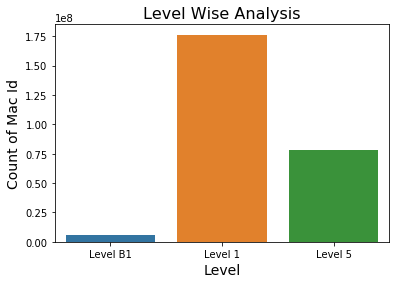

In [17]:
plt.figure(figsize=(6,4))
sns.barplot('level', 'count', data=level, palette='tab10')
plt.title('Level Wise Analysis', fontsize=16)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Count of Mac Id', fontsize=14)

#### Droping column which are not required for our model

We do not neet column Building

In [4]:
df.groupBy('Building').count().show()

+--------+---------+
|Building|    count|
+--------+---------+
| Gallery|260068750|
+--------+---------+



In [9]:
df = df.drop('Building')

In [6]:
df.columns

['Level', 'ClientMacAddr', 'lat', 'lng', 'localtime']

In [7]:
type(df)

pyspark.sql.dataframe.DataFrame

### Analysis based on MAC address 

In [8]:
df.head(2)

[Row(Level='Level5', ClientMacAddr='38:ff:36:4c:1a:18', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 18:20:29.538 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:42:08.382 UTC')]

### Transforming timestamp

number of rows before filtering the dataset

In [9]:
df.count()

260068750

In [14]:
def cal_lenth(s):
    return len(s)

In [6]:
from pyspark.sql.functions import length

In [10]:
df_timestamp=df.where((length("localtime")) > 9)

In [20]:
df_timestamp.count()

260068750

In [21]:
df.where((length("localtime")) <= 9).show()

+-----+-------------+---+---+---------+
|Level|ClientMacAddr|lat|lng|localtime|
+-----+-------------+---+---+---------+
+-----+-------------+---+---+---------+



In [23]:
type(df_timestamp)

pyspark.sql.dataframe.DataFrame

In [25]:
time_rdd = df_timestamp.rdd

In [26]:
print(type(time_rdd))

<class 'pyspark.rdd.RDD'>


In [30]:
df_timestamp.head(2)

[Row(Level='Level5', ClientMacAddr='38:ff:36:4c:1a:18', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 18:20:29.538 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:42:08.382 UTC')]

In [40]:
df_time=df.select('localtime').rdd.map(lambda x:x[:19]).toDF()

In [41]:
df_time.show(2)

+--------------------+
|                  _1|
+--------------------+
|2018-07-31 18:20:...|
|2018-07-31 13:42:...|
+--------------------+
only showing top 2 rows



In [51]:
df_date=df_time.select('_1').rdd.map(lambda x:x[:10]).toDF()

In [52]:
df_date.show()

+--------------------+
|                  _1|
+--------------------+
|2018-07-31 18:20:...|
|2018-07-31 13:42:...|
|2018-07-31 14:58:...|
|2018-07-31 17:44:...|
|2018-07-31 13:26:...|
|2018-07-31 15:35:...|
|2018-07-31 17:57:...|
|2018-07-31 18:32:...|
|2018-07-31 15:26:...|
|2018-07-31 16:20:...|
|2018-07-31 16:14:...|
|2018-07-31 17:23:...|
|2018-07-31 17:08:...|
|2018-07-31 18:44:...|
|2018-07-31 19:10:...|
|2018-07-31 19:31:...|
|2018-07-31 19:31:...|
|2018-07-31 15:35:...|
|2018-07-31 15:35:...|
|2018-07-31 15:35:...|
+--------------------+
only showing top 20 rows



In [57]:
from pyspark.sql.functions import to_utc_timestamp

In [63]:
df_with_timestamp = df_timestamp.select(to_utc_timestamp(df_timestamp.localtime, 'UTC').alias('dt'))

In [64]:
type(df_with_timestamp)

pyspark.sql.dataframe.DataFrame

In [61]:
df_with_timestamp.head(3)

[Row(dt=None), Row(dt=None), Row(dt=None)]

In [65]:
df_timestamp.registerTempTable("table")

In [ ]:
number 

In [66]:
sqlContext.sql('select distinct Level from table').show(5)

+--------+
|   Level|
+--------+
|  Level5|
| Level 1|
|Level B1|
+--------+



In [11]:
df_timestamp.head(3)

[Row(Level='Level5', ClientMacAddr='38:ff:36:4c:1a:18', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 18:20:29.538 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:42:08.382 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 14:58:17.652 UTC')]

In [20]:
df_month = df_timestamp.select('localtime')

In [21]:
type(df_month)

pyspark.sql.dataframe.DataFrame

In [26]:
df_timestamp.head(5)

[Row(Level='Level5', ClientMacAddr='38:ff:36:4c:1a:18', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 18:20:29.538 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:42:08.382 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ad:23', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 14:58:17.652 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:ae:53', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 17:44:47.816 UTC'),
 Row(Level='Level5', ClientMacAddr='38:ff:36:4c:b5:83', lat='1.29086614', lng='103.85172392', localtime='2018-07-31 13:26:17.971 UTC')]